## Import libraries:

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import rasterio
import gzip
import datetime 
from os.path import *
from os import listdir
import pandas
from matplotlib_scalebar.scalebar import ScaleBar
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar


# View Landsat 8 RGB and SWIR bands for one Image

In [2]:
def normalize_red(array):
    return (array - array.min()) / (array.max() - array.min())
def normalize_green(array):
    return (array - array.min()) / (array.max() - array.min())
def normalize_blue(array):
    return (array - array.min()) / (array.max() - array.min())

RGB Image:

Running...


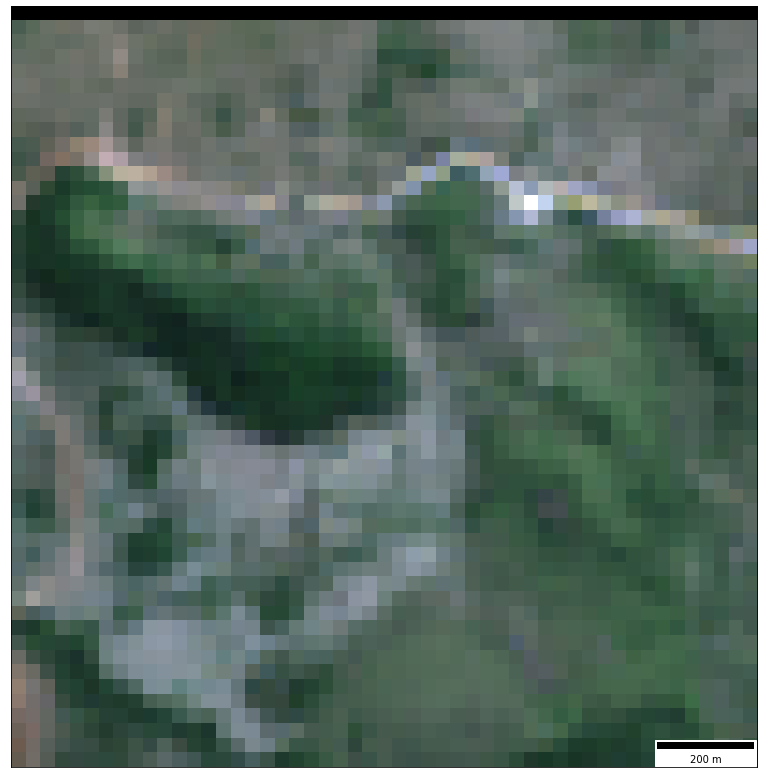

In [32]:
print ("Running...") 
import matplotlib.gridspec as gridspec

fig, axarr = plt.subplots(1,1, figsize=(14,14))#, gridspec_kw = {'wspace':0.5, 'hspace':0})

#gs1 = gridspec.GridSpec(4, 4)
#gs1.update(wspace=0.025, hspace=0.05) # set the spacing between axes. 

#fig.subplots_adjust(wspace=0, hspace=0)
# Get the list of all quads in the directory they have been downloaded from:
#TEMP_DIR = '/Volumes/GoogleDrive-103278653964135897318/My Drive/TemporalCerrado2018/1_0-3_2018-01-01.tif'

TEMP_DIR = f'/Volumes/GoogleDrive-103278653964135897318/My Drive/AmaToInc-2021/2.tif'
# GOOD: 1_0-0_2018-01-01.tif, 
# Really good: 1_0-3_2018-01-01.tif, 1_0-5_2018-01-01.tif
# RGB IMAGE:
raster = rasterio.open(TEMP_DIR )
red = raster.read(4)
green = raster.read(3)
blue = raster.read(2)

red_norm = normalize_red(red)
green_norm = normalize_green(green)
blue_norm = normalize_blue(blue)

# Stack bands
rgb = np.dstack((red_norm, green_norm, blue_norm))

scalebar = ScaleBar(30, location='lower right')
axarr.add_artist(scalebar)
axarr.set_xticks([])
axarr.set_yticks([])
axarr.set_ylabel("")
#axarr[row][i].set_aspect('equal')
axarr.imshow(rgb)

plt.show()


RGB next to SNDVI

Running...
(52, 51)


/var/folders/0j/jnf_wjrj2z561dttzqc4x4zr0000gq/T/ipykernel_4393/3543225628.py:53: RuntimeWarning: invalid value encountered in true_divide
  sndvi = (swir_norm+nir_norm-red_norm)/(swir_norm+nir_norm+red_norm)


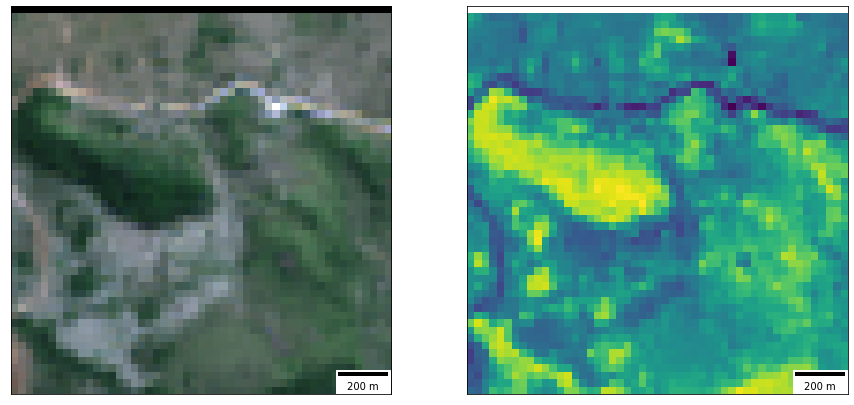

In [56]:
print ("Running...") 
import matplotlib.gridspec as gridspec

fig, axarr = plt.subplots(1,2, figsize=(15,15))#, gridspec_kw = {'wspace':0.5, 'hspace':0})

#gs1 = gridspec.GridSpec(4, 4)
#gs1.update(wspace=0.025, hspace=0.05) # set the spacing between axes. 


#fig.subplots_adjust(wspace=0, hspace=0)
# Get the list of all quads in the directory they have been downloaded from:
#TEMP_DIR = '/Volumes/GoogleDrive-103278653964135897318/My Drive/TemporalCerrado2018/1_0-3_2018-01-01.tif'
TEMP_DIR = f'/Volumes/GoogleDrive-103278653964135897318/My Drive/AmaToInc-2021/{2}.tif'
count += 1
# GOOD: 1_0-0_2018-01-01.tif, 
# Really good: 1_0-3_2018-01-01.tif, 1_0-5_2018-01-01.tif
# RGB IMAGE:
raster = rasterio.open(TEMP_DIR )
red = raster.read(4)
green = raster.read(3)
blue = raster.read(2)

red_norm = normalize_red(red)
green_norm = normalize_green(green)
blue_norm = normalize_blue(blue)

# Stack bands
rgb = np.dstack((red_norm, green_norm, blue_norm))

scalebar = ScaleBar(30, location='lower right')
axarr[0].add_artist(scalebar)
axarr[0].set_xticks([])
axarr[0].set_yticks([])
axarr[0].set_ylabel("")
#axar[0]ow][i].set_aspect('equal')
axarr[0].imshow(rgb)


# SNDVI IMAGE:
raster = rasterio.open(TEMP_DIR )

red = raster.read(4)
nir = raster.read(5)
swir1 = raster.read(6)
swir2 = raster.read(7)

swir = swir1+swir2

red_norm = normalize_red(red)
nir_norm = normalize_red(nir)
swir_norm = normalize_red(swir)

sndvi = (swir_norm+nir_norm-red_norm)/(swir_norm+nir_norm+red_norm)

print (sndvi.shape)
scalebar = ScaleBar(30, location='lower right')
axarr[1].add_artist(scalebar)
axarr[1].set_xticks([])
axarr[1].set_yticks([])
axarr[1].set_ylabel("")
#axar[1]ow][i].set_aspect('equal')
axarr[1].imshow(sndvi)

# NDVI IMAGE:
# raster = rasterio.open(TEMP_DIR )

# red = raster.read(4)
# nir = raster.read(5)
# swir1 = raster.read(6)
# swir2 = raster.read(7)

# swir = swir1+swir2

# red_norm = normalize_red(red)
# nir_norm = normalize_red(nir)
# swir_norm = normalize_red(swir)

# ndvi = (nir_norm-red_norm)/(nir_norm+red_norm)


# scalebar = ScaleBar(30, location='lower right')
# axarr[2].add_artist(scalebar)
# axarr[2].set_xticks([])
# axarr[2].set_yticks([])
# axarr[2].set_ylabel("")
# #axar[2]ow][i].set_aspect('equal')
# axarr[2].imshow(ndvi)

plt.show()



## View Metadata of Image

In [13]:
TEMP_DIR = r'/Volumes/GoogleDrive/My Drive/TemporalCerrado2018/1_0-3_2018-01-01.tif'

import exifread
# Open image file for reading (binary mode)
f = open(TEMP_DIR, 'rb')

# Return Exif tags
tags = exifread.process_file(f)

# Print the tag/ value pairs
for tag in tags.keys():
    if tag not in ('JPEGThumbnail', 'TIFFThumbnail', 'Filename', 'EXIF MakerNote'):
        print ("Key: %s, value %s" % (tag, tags[tag]))

Key: Image ImageWidth, value 50
Key: Image ImageLength, value 52
Key: Image BitsPerSample, value [16, 16, 16, 16, 16, 16, 16]
Key: Image Compression, value LZW
Key: Image PhotometricInterpretation, value 1
Key: Image SamplesPerPixel, value 7
Key: Image PlanarConfiguration, value 1
Key: Image Predictor, value None
Key: Image TileWidth, value 256
Key: Image TileLength, value 256
Key: Image TileOffsets, value 950
Key: Image TileByteCounts, value 42364
Key: Image ExtraSamples, value UnspecifiedUnspecifiedUnspecifiedUnspecifiedUnspecifiedUnspecified
Key: Image SampleFormat, value SignedSignedSignedSignedSignedSignedSigned
Key: Image Tag 0x830E, value [(30.0,), (30.0,), (0.0,)]
Key: Image Tag 0x8482, value [(0.0,), (0.0,), (0.0,), (533475.0,), (-1594755.0,), (0.0,)]
Key: Image Tag 0x87AF, value [1, 1, 0, 7, 1024, 0, 1, 1, 1025, 0, 1, 1, 1026, 34737, 22, 0, 2049, 34737, 7, 22, 2054, 0, 1, 9102, 3072, 0, 1, 32623, 3076, 0, 1, 9001]
Key: Image Tag 0x87B1, value WGS 84 / UTM zone 23N|WGS 84|
Key

# View Date Distribution

## Month displacement

In [54]:
# Get all but .DS_STORE
Dates_DIR = '/Users/calum/Documents/Biome Dates'
dirs = os.listdir(Dates_DIR)
dirs.remove('.DS_Store')

amazon_dates = []
cerrado_dates = []
caatinga_dates = []

for cur_dir in dirs:
    quad_DIR = os.path.join(Dates_DIR, cur_dir)
    spreadsheets = os.listdir(quad_DIR)
    for sheet in spreadsheets:
        if sheet != '.DS_Store':
            sheet_DIR = os.path.join(quad_DIR, sheet)
            dict = pandas.read_csv(sheet_DIR)
            dates = dict.Date.str.split('T')
            for date in dates:
                if 'Caatinga' in quad_DIR:
                    caatinga_dates.append(date[0].replace('-', ''))
                if 'Amazon' in quad_DIR:
                    amazon_dates.append(date[0].replace('-', ''))
                if 'Cerrado' in quad_DIR:
                    cerrado_dates.append(date[0].replace('-', ''))
                

In [58]:
print (np.sum(cat_months))
print (np.sum(ama_months))
print (np.sum(cer_months))

570493
318491
444168


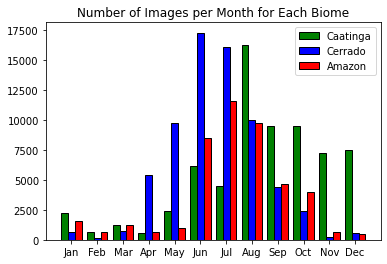

In [55]:
dtm = lambda x: int(x[4:6])
cat_months = list(map(dtm, caatinga_dates))
ama_months = list(map(dtm, amazon_dates))
cer_months = list(map(dtm, cerrado_dates))

fig, ax = plt.subplots()
bins = np.arange(1,14)
ax.hist([cat_months, cer_months, ama_months], bins = bins, edgecolor="k", align='left', color=['green', 'blue', 'red'])
ax.set_xticks(bins[:-1])
ax.set_xticklabels([datetime.date(1900,i,1).strftime('%b') for i in bins[:-1]] )
plt.legend(['Caatinga', 'Cerrado', 'Amazon'])
plt.title('Number of Images per Month for Each Biome')
plt.show()

In [47]:
print (len(caatinga_dates))
print (len(amazon_dates))
print (len(cerrado_dates))

10200
4148
13600


## Quad Displacement

### For Temporal Data

In [41]:
# Get all but .DS_STORE
train_DIR = '/Volumes/GoogleDrive/My Drive/TemporalData-Train'
test_DIR = '/Volumes/GoogleDrive/My Drive/TemporalData-Eval'
train_dirs = os.listdir(train_DIR)
test_dirs = os.listdir(test_DIR)

quad_1 = np.array([0, 0, 0])
quad_2 = np.array([0, 0, 0])
quad_3 = np.array([0, 0, 0])
quad_4 = np.array([0, 0, 0])
quads = [quad_1, quad_2, quad_3, quad_4]

for set_DIR in [train_DIR, test_DIR]:
    biomes = os.listdir(set_DIR)
    for cur_dir in biomes:
        biome_DIR = os.path.join(set_DIR, cur_dir)
        cur_biome = os.listdir(biome_DIR)
        cur_quad = 0
        for quad in cur_biome:
            quad_DIR = os.path.join(biome_DIR, quad)
            quad_images = os.listdir(quad_DIR)
            for img in quad_images:
                img_DIR = os.path.join(quad_DIR, img)
                num_images = len(os.listdir(img_DIR))
                if "Amazonia" in quad_DIR:
                    quads[cur_quad][0] += num_images
                elif "Cerrado" in quad_DIR:
                    quads[cur_quad][1] += num_images
                elif "Caatinga" in quad_DIR:
                    quads[cur_quad][2] += num_images
                else:
                    print (quad_DIR)
            
            cur_quad += 1
                

In [42]:
print (np.array(quads))
print (np.sum(quads))

[[2515 2998 3006]
 [2403 3190 2738]
 [3084 3183 2489]
 [3482 2942 2954]]
34984


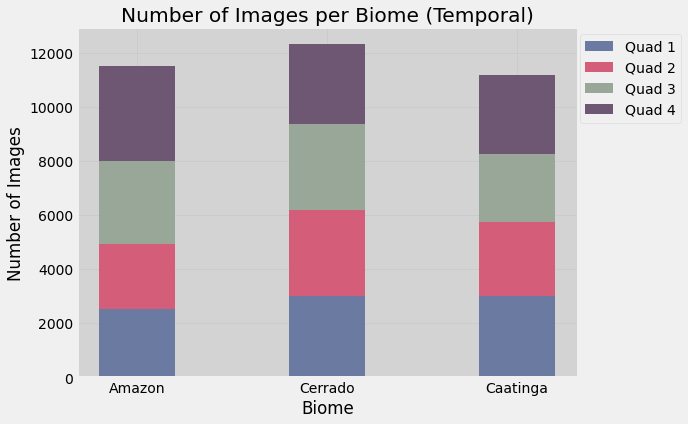

In [43]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(8,6))
labels = ['Amazon', 'Cerrado', 'Caatinga']
ax.bar(labels, quads[0], label='Quad 1', width=0.4, color = '#6B7AA1')
ax.bar(labels, quads[1], bottom = quads[0], width=0.4, label='Quad 2', color='#D45D79')
ax.bar(labels, quads[2], bottom = quads[0]+quads[1],width=0.4, label='Quad 3', color='#99A799')
ax.bar(labels, quads[3], bottom = quads[0]+quads[1]+quads[2], width=0.4,label='Quad 4', color='#6E5773')
ax.set_facecolor(color='lightgrey')
plt.title('Number of Images per Biome (Temporal)')
plt.ylabel('Number of Images')
plt.xlabel('Biome')
ax.legend(bbox_to_anchor=(1.22,1))
plt.show()

### For Spatial Data

In [44]:

# Get all but .DS_STORE
head_DIR = '/Volumes/GoogleDrive/My Drive/'

biomes = ['Amazonia', 'Cerrado', 'Caatinga']


quad_1 = np.array([0, 0, 0])
quad_2 = np.array([0, 0, 0])
quad_3 = np.array([0, 0, 0])
quad_4 = np.array([0, 0, 0])
quads = [quad_1, quad_2, quad_3, quad_4]

cur_img = 0
        
for biome in biomes:
        desired_quads = [1,2,3,4]

        biome_idx = 0

        cur_quad = 0
        
        for quad in desired_quads:

            quad_idx = 0

            biome_DIR = head_DIR + biome + ' 2019 Quad ' + str(quad) + '/'

            images = [f.path for f in os.scandir(biome_DIR) if f.is_file() and '.tif' in f.path]
            if "Amazonia" in biome_DIR:
                quads[cur_quad][0] += len(images)
            elif "Cerrado" in biome_DIR:
                quads[cur_quad][1] += len(images)
            elif "Caatinga" in biome_DIR:
                quads[cur_quad][2] += len(images)
            else:
                print (biome_DIR)
            
            cur_quad += 1
                

In [45]:
quads

[array([2400, 3350, 3347]),
 array([2421, 3350, 2866]),
 array([2660, 2823, 2609]),
 array([3311, 3314, 2889])]

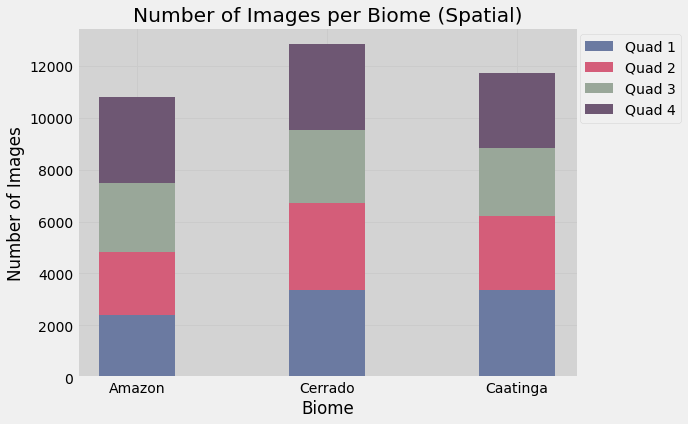

In [46]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(8,6))
labels = ['Amazon', 'Cerrado', 'Caatinga']
ax.bar(labels, quads[0], label='Quad 1', width=0.4, color = '#6B7AA1')
ax.bar(labels, quads[1], bottom = quads[0], width=0.4, label='Quad 2', color='#D45D79')
ax.bar(labels, quads[2], bottom = quads[0]+quads[1],width=0.4, label='Quad 3', color='#99A799')
ax.bar(labels, quads[3], bottom = quads[0]+quads[1]+quads[2], width=0.4,label='Quad 4', color='#6E5773')
ax.set_facecolor(color='lightgrey')
plt.title('Number of Images per Biome (Spatial)')
plt.ylabel('Number of Images')
plt.xlabel('Biome')
ax.legend(bbox_to_anchor=(1.22,1))
plt.show()

## View Before and After shot of image that changes class

Running...
(52, 51, 3)


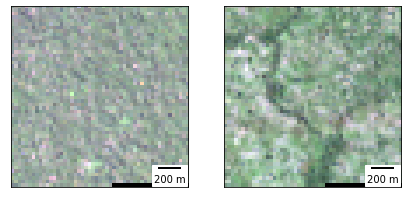

In [13]:
print ("Running...") 
import matplotlib.gridspec as gridspec

fig, axarr = plt.subplots(1,2, figsize=(7,7))#, gridspec_kw = {'wspace':0.5, 'hspace':0})

# Get the list of all quads in the directory they have been downloaded from:
before_DIR = '/Volumes/GoogleDrive/My Drive/AreaOfDeforestation-2016/3.tif'
after_DIR = '/Volumes/GoogleDrive/My Drive/AreaOfDeforestation-2021/3.tif'

# RGB IMAGE:
raster = rasterio.open(before_DIR )
red = raster.read(4)
green = raster.read(3)
blue = raster.read(2)

red_norm = normalize_red(red)
green_norm = normalize_green(green)
blue_norm = normalize_blue(blue)

# Stack bands
rgb = np.dstack((red_norm, green_norm, blue_norm))

scalebar = ScaleBar(30, location='lower right')
axarr[0].add_artist(scalebar)
axarr[0].set_xticks([])
axarr[0].set_yticks([])
axarr[0].set_ylabel("")
axarr[0].imshow(rgb)


# SWIR IMAGE:
raster = rasterio.open(after_DIR )
red = raster.read(4)
green = raster.read(3)
blue = raster.read(2)

red_norm = normalize_red(red)
green_norm = normalize_green(green)
blue_norm = normalize_blue(blue)

# Stack bands
rgb = np.dstack((red_norm, green_norm, blue_norm))

scalebar = ScaleBar(30, location='lower right')
axarr[1].add_artist(scalebar)
axarr[1].set_xticks([])
axarr[1].set_yticks([])
axarr[1].set_ylabel("")
axarr[1].imshow(rgb)

plt.show()


## Add ScaleBar to a loaded image

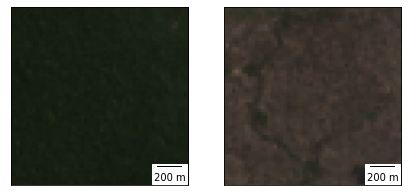

In [25]:
fig, axarr = plt.subplots(1,2, figsize=(7,7))#, gridspec_kw = {'wspace':0.5, 'hspace':0})

image_before = plt.imread('/Users/calummcmeekin/Documents/GitHub/MInf-Project/Part 2/Report/DeforestationBefore.png')

axarr[0].set_xticks([])
axarr[0].set_yticks([])
axarr[0].set_ylabel("")

scalebar = ScaleBar(2, location='lower right') # 1 pixel = 0.2 meter
axarr[0].add_artist(scalebar)

axarr[0].imshow(image_before)

image_after = plt.imread('/Users/calummcmeekin/Documents/GitHub/MInf-Project/Part 2/Report/DeforestationAfter.png')

axarr[1].set_xticks([])
axarr[1].set_yticks([])
axarr[1].set_ylabel("")

scalebar = ScaleBar(2, location='lower right') # 1 pixel = 0.2 meter
axarr[1].add_artist(scalebar)

axarr[1].imshow(image_after)


plt.show()

Looking at all the images the majority stay pretty regular unless some cloud cover came over. This was determined from inspecting the class changes of one image over time.

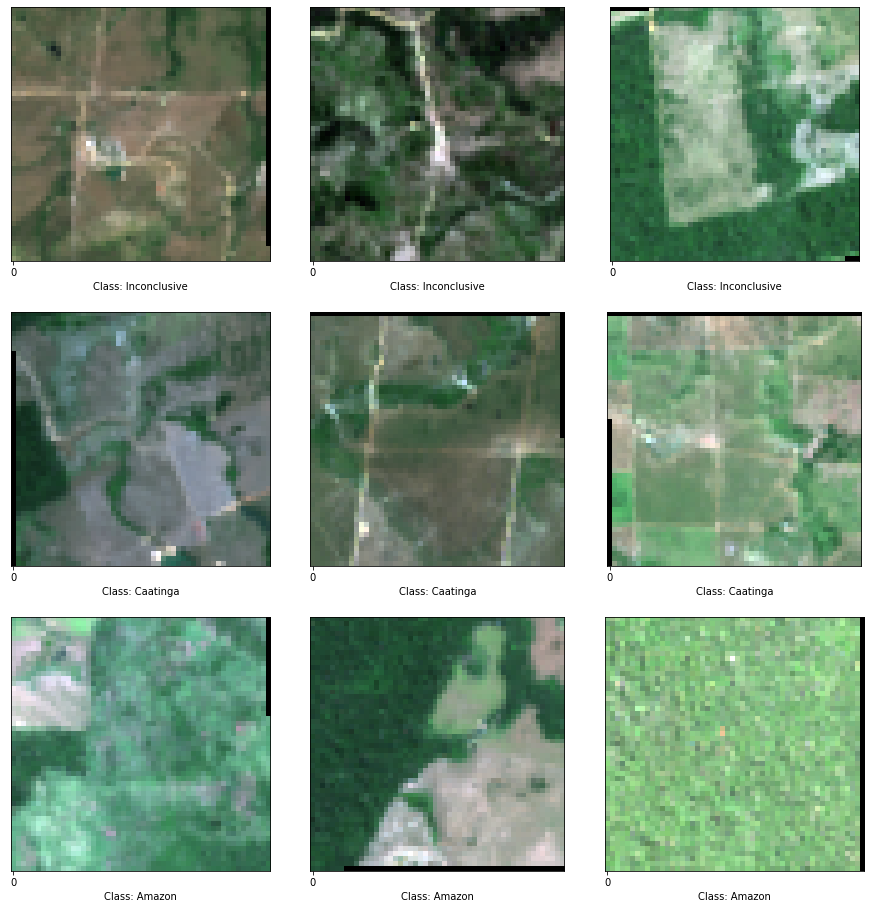

In [49]:
dir = '/Users/calum/Downloads/PP_GridPoints_2020'
imgs = ['11.tif', '89.tif', '84.tif', '73.tif', '57.tif', '44.tif', '16.tif', '40.tif', '67.tif']
labels = ['Inconclusive', 'Inconclusive', 'Inconclusive', 'Caatinga', 'Caatinga', 'Caatinga', 'Amazon', 'Amazon', 'Amazon']
_, axs = plt.subplots(3, 3, figsize=(12, 12))
axs = axs.flatten()
i = 0
for img_name, ax in zip(imgs, axs):
    cur_dir = os.path.join(dir, img_name)
    
    raster = rasterio.open(cur_dir)
    red = raster.read(4)
    green = raster.read(3)
    blue = raster.read(2)

    red_norm = normalize_red(red)
    green_norm = normalize_green(green)
    blue_norm = normalize_blue(blue)

    # Stack bands
    rgb = np.dstack((red_norm, green_norm, blue_norm))

    ax.imshow(rgb)
    ax.set_xticks([0])
    ax.set_yticks([])
    ax.set_xlabel('Class: ' + labels[i])
    i += 1
    
plt.subplots_adjust(wspace=0.1, hspace=0.2, left=0, right=1, bottom=0, top=1)

plt.show()

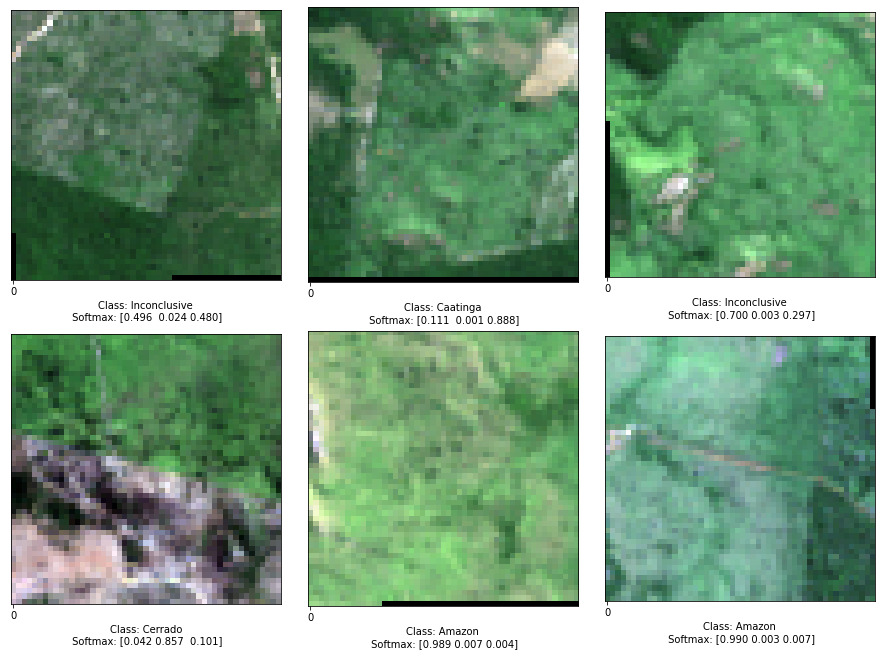

In [6]:
dir = '/Users/calum/Downloads/PP_GridPoints_2020'
imgs = ['112.tif', '113.tif', '114.tif', '115.tif', '92.tif', '93.tif']
labels = ['Inconclusive', 'Caatinga', 'Inconclusive', 'Cerrado', 'Amazon', 'Amazon', 'Amazon', 'Amazon', 'Amazon']
softmaxes = ['[0.496  0.024 0.480]', '[0.111  0.001 0.888]',	'[0.700 0.003 0.297]',	'[0.042 0.857  0.101]',	'[0.989 0.007 0.004]',	'[0.990 0.003 0.007]']

_, axs = plt.subplots(2, 3, figsize=(12, 12))
axs = axs.flatten()
i = 0
for img_name, ax in zip(imgs, axs):
    cur_dir = os.path.join(dir, img_name)
    
    raster = rasterio.open(cur_dir)
    red = raster.read(4)
    green = raster.read(3)
    blue = raster.read(2)

    red_norm = normalize_red(red)
    green_norm = normalize_green(green)
    blue_norm = normalize_blue(blue)

    # Stack bands
    rgb = np.dstack((red_norm, green_norm, blue_norm))

    ax.imshow(rgb)
    ax.set_xticks([0])
    ax.set_yticks([])
    ax.set_xlabel('Class: ' + labels[i] + '\n Softmax: ' + softmaxes[i])
    i += 1
    
plt.subplots_adjust(wspace=0.1, hspace=-0.4, left=0, right=1, bottom=0, top=1)

plt.show()

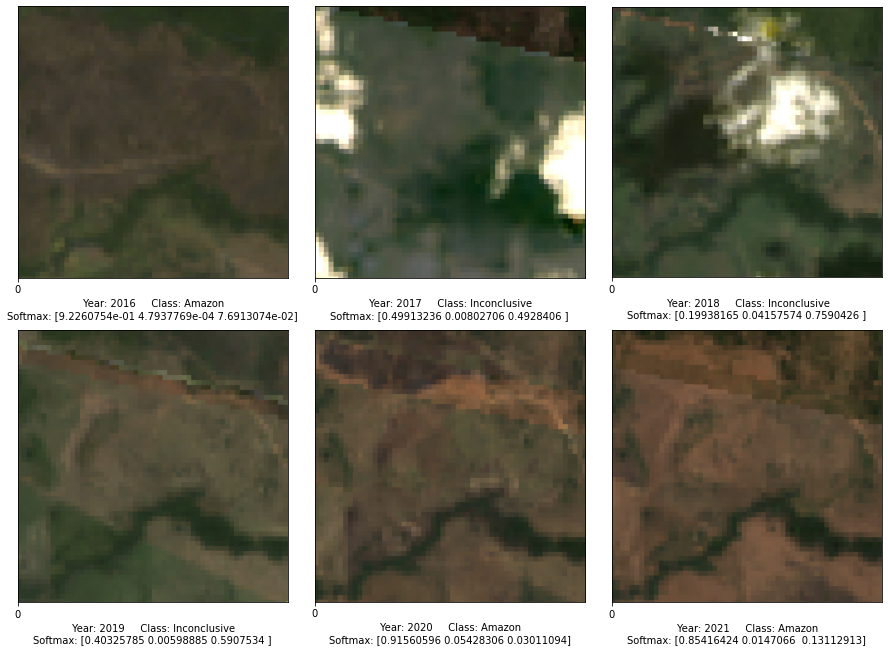

In [41]:
dir = '/Users/calum/Documents/GitHub/MInf-Project/Part 2/Report/ProgressiveChanges'
imgs = ['2016.png', '2017.png', '2018.png', '2019.png', '2020.png', '2021.png']
labels = ['Amazon', 'Inconclusive', 'Inconclusive', 'Inconclusive', 'Amazon', 'Amazon']
softmaxes = ['[9.2260754e-01 4.7937769e-04 7.6913074e-02]',	'[0.49913236 0.00802706 0.4928406 ]',	'[0.19938165 0.04157574 0.7590426 ]',	'[0.40325785 0.00598885 0.5907534 ]',	'[0.91560596 0.05428306 0.03011094]',	'[0.85416424 0.0147066  0.13112913]']
probs = ['[92\% 4.7937769e-04 7.6913074e-02]',	'[0.49913236 0.00802706 0.4928406 ]',	'[0.19938165 0.04157574 0.7590426 ]',	'[0.40325785 0.00598885 0.5907534 ]',	'[0.91560596 0.05428306 0.03011094]',	'[0.85416424 0.0147066  0.13112913]']
_, axs = plt.subplots(2, 3, figsize=(12, 12))
axs = axs.flatten()
i = 0
for img_name, ax in zip(imgs, axs):
    cur_dir = os.path.join(dir, 'single ' + img_name)
    img = plt.imread(cur_dir)
    ax.imshow(img)
    ax.set_xticks([0])
    ax.set_yticks([])
    ax.set_xlabel(' Year: ' + img_name.split('.')[0] + '     Class: ' + labels[i] + '\nSoftmax: ' + softmaxes[i])
    i += 1
    
plt.subplots_adjust(wspace=0.1, hspace=-0.4, left=0, right=1, bottom=0, top=1)

plt.show()

The image that was previously classed as the Amazon but then in just one year later classed at the Caatinga with a sudden percentage change was investigated.

It was found that only slight deforestation had taken place, but this alone was enough to convice the model that the image belonged to the Caatinga class. 

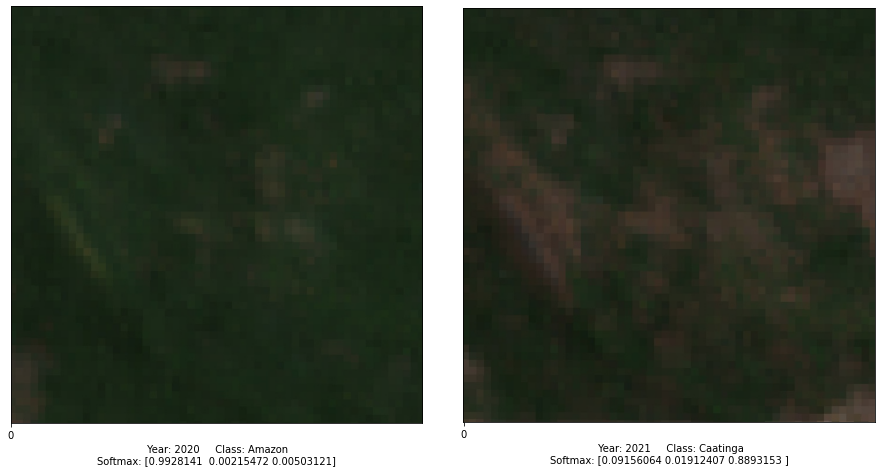

In [44]:
dir = '/Users/calum/Documents/GitHub/MInf-Project/Part 2/Report/ProgressiveChanges'
imgs = ['2020.png', '2021.png']
labels = ['Amazon', 'Caatinga']
softmaxes = ['[0.9928141  0.00215472 0.00503121]',	'[0.09156064 0.01912407 0.8893153 ]']
_, axs = plt.subplots(1, 2, figsize=(12, 12))
axs = axs.flatten()
i = 0
for img_name, ax in zip(imgs, axs):
    cur_dir = os.path.join(dir, 'AmaToCat' + img_name)
    img = plt.imread(cur_dir)
    ax.imshow(img)
    ax.set_xticks([0])
    ax.set_yticks([])
    ax.set_xlabel(' Year: ' + img_name.split('.')[0] + '     Class: ' + labels[i] + '\nSoftmax: ' + softmaxes[i])
    i += 1
    
plt.subplots_adjust(wspace=0.1, hspace=-0.4, left=0, right=1, bottom=0, top=1)

plt.show()

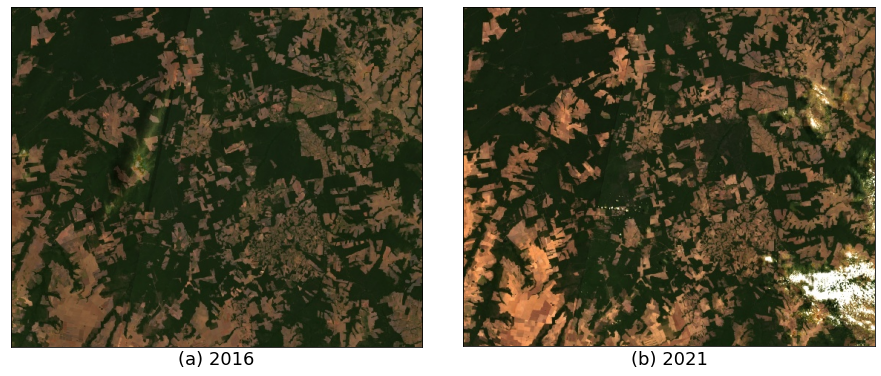

In [25]:
dir = '/Users/calum/Documents/GitHub/MInf-Project/Part 2/Report/'
imgs = ['Deforestation_2016_Cropped.png', 'Deforestation_2021_Cropped.png']
labels = ['(a) 2016', '(b) 2021']
_, axs = plt.subplots(1, 2, figsize=(12, 12))
axs = axs.flatten()
i = 0
for img_name, ax in zip(imgs, axs):
    cur_dir = os.path.join(dir, img_name)
    img = plt.imread(cur_dir)
    if i == 1:
        ax.imshow(img[10:-46])
    else:
        ax.imshow(img[90:])
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel(labels[i],fontsize=18)
    i += 1
    
plt.subplots_adjust(wspace=0.1, hspace=-0.4, left=0, right=1, bottom=0, top=1)

plt.show()

In order to establish if this was a mistake or not, 10 images were randomly sampled from the Caatinga biome and inspected.

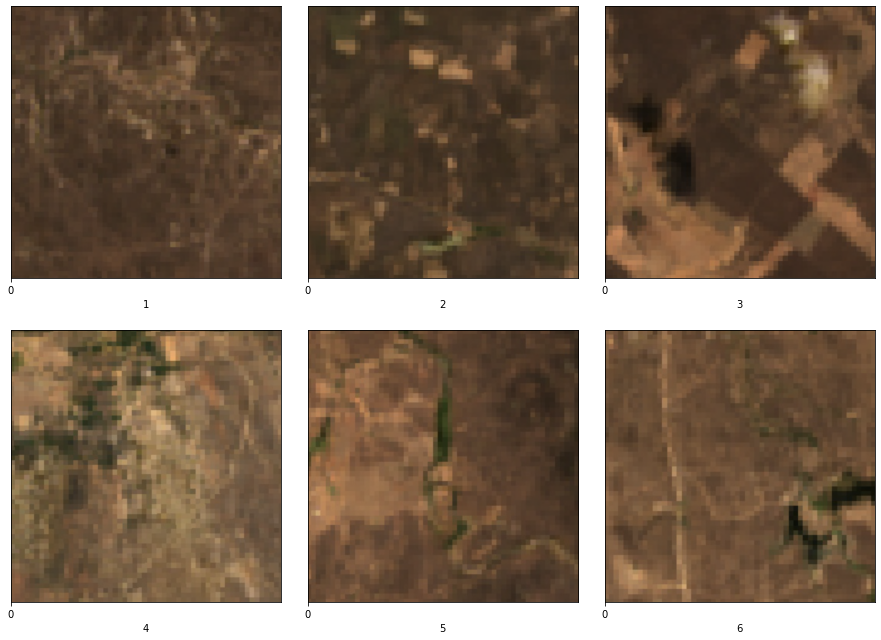

In [46]:
dir = '/Users/calum/Documents/GitHub/MInf-Project/Part 2/Report/ProgressiveChanges'
imgs = ['1.png', '2.png', '3.png', '4.png', '5.png', '6.png']
labels = ['Amazon', 'Inconclusive', 'Inconclusive', 'Inconclusive', 'Amazon', 'Amazon']
softmaxes = ['[9.2260754e-01 4.7937769e-04 7.6913074e-02]',	'[0.49913236 0.00802706 0.4928406 ]',	'[0.19938165 0.04157574 0.7590426 ]',	'[0.40325785 0.00598885 0.5907534 ]',	'[0.91560596 0.05428306 0.03011094]',	'[0.85416424 0.0147066  0.13112913]']
probs = ['[92\% 4.7937769e-04 7.6913074e-02]',	'[0.49913236 0.00802706 0.4928406 ]',	'[0.19938165 0.04157574 0.7590426 ]',	'[0.40325785 0.00598885 0.5907534 ]',	'[0.91560596 0.05428306 0.03011094]',	'[0.85416424 0.0147066  0.13112913]']
_, axs = plt.subplots(2, 3, figsize=(12, 12))
axs = axs.flatten()
i = 0
for img_name, ax in zip(imgs, axs):
    cur_dir = os.path.join(dir, 'cat_' + img_name)
    img = plt.imread(cur_dir)
    ax.imshow(img)
    ax.set_xticks([0])
    ax.set_yticks([])
    ax.set_xlabel(i+1)
    i += 1
    
plt.subplots_adjust(wspace=0.1, hspace=-0.4, left=0, right=1, bottom=0, top=1)

plt.show()

This did not reveal any reason as to why this happened and so the next step was to run clustering on the data and see what the most most distinctive features of each class are. 

It could also be the case that 1.5k^2 is too coarse to pick up the nuanced changes that each of these biomes have. On the whole it seems that the model is accurate at classfying the biomes but detecting change might require a higher resolution

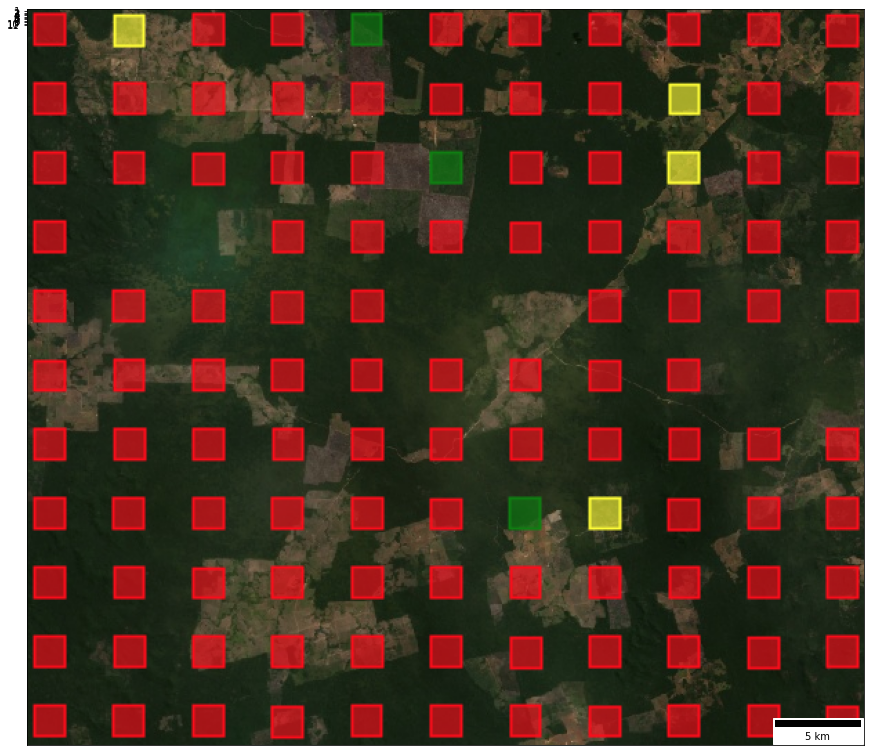

In [33]:
fig, axarr = plt.subplots(1,1, figsize=(15,15))#, gridspec_kw = {'wspace':0.5, 'hspace':0})

image_before = plt.imread('/Users/calum/Documents/GitHub/MInf-Project/Part 2/Report/PP_GridPoints_2016.png')

axarr.set_xticks([])
axarr.set_yticks([1, 2, 3, 4, 5, 6, 7, 8 , 9, 10, 11])
# axarr.set_xlabel("(a) 2016", fontsize=20)
axarr.set_ylabel("")
ax.tick_params(axis='y', which='minor', pad=1500)
scalebar = ScaleBar(80, location='lower right') # 1 pixel = 0.2 meter
axarr.add_artist(scalebar)

axarr.imshow(image_before)

# image_after = plt.imread('/Users/calum/Documents/GitHub/MInf-Project/Part 2/Report/PP_GridPoints_2020.png')

# axarr[1].set_xticks([])
# axarr[1].set_yticks([])
# axarr[1].set_xlabel("(b) 2020", fontsize=20)
# axarr[1].set_ylabel("")

# scalebar = ScaleBar(80, location='lower right') # 1 pixel = 0.2 meter
# axarr[1].add_artist(scalebar)

# axarr[1].imshow(image_after)


plt.show()